## Code for PALM static driver vegetation

#### By Eva Bendix Nielsen 28/09/2023

Restart kernel before run

In [1]:
import xarray as xr
import rioxarray
import numpy as np
import pandas as pd
import rasterio
import os
import glob
import matplotlib.pyplot as plt
os.chdir('/home/UOCNT/eni22/GEO4PALM')
import numpy.ma as ma
import importlib

In [2]:
from util.pre_process_tif import *
from util.loc_dom import *
from util.read_geo import *
from util.create_static import*
from Static_driver_vegetation_2D import *
from Static_driver_vegetation_3D import *


In [3]:
#Instead of namelist


case_name = "bottle_lake"   # prefix for a case
origin_time = "2019-02-01 00:00:00 +00"          # time in yyyy-mm-dd HH:MM:SS +HH format (+00 as in UTC)  
config_proj = "EPSG:2193" # projection for PALM
default_proj = "EPSG:4326" # projection of lat/lon to find domain location

ndomain   = 4,                                     # max number of domains
centlat   = -43.47040                           # centre latitude
centlon   = 172.692877                           # centre longitude
nx        =  324 
ny        = 324
nz        = 432 
dx        = 1.0 
dy        = 1.0  
dz        = 1.0 
z_origin  = 0.0 
ll_x      = 3888.0   
ll_y      = 3888.0 


## No need to change start/end dates for NASA SRTMGL1_NC.003 
dem_start_date = '2000-02-12'
dem_end_date = '2000-02-20'
## start/end dates for land use data set
lu_start_date = '2020-10-01'
lu_end_date = '2020-10-30'

tree_lai_max   =  5.0, 5.0, 5.0,
lad_max_height =  0.4, 0.4, 0.4,

i=0
dom_cfg_d01 = {'origin_time': origin_time,
                    'centlat': centlat,  
                    'centlon': centlon,
                    'dx': dx,
                    'dy': dy,
                    'dz': dz,
                    'nx': nx,
                    'ny': ny,
                    'nz': nz,
                    'z_origin': z_origin,
                    'tree_lai_max': tree_lai_max[0], #changed
                    'lad_max_height': lad_max_height[0],
                    }

tmp_path = '/home/UOCNT/eni22/GEO4PALM/JOBS/Bottle_Lake/INPUT/'

In [4]:
dom_cfg = domain_location(default_proj,config_proj, dom_cfg_d01)

In [5]:
dom_cfg_d01

{'origin_time': '2019-02-01 00:00:00 +00',
 'centlat': -43.4704,
 'centlon': 172.692877,
 'dx': 1.0,
 'dy': 1.0,
 'dz': 1.0,
 'nx': 324,
 'ny': 324,
 'nz': 432,
 'z_origin': 0.0,
 'tree_lai_max': 5.0,
 'lad_max_height': 0.4,
 'west': 1574997.214784141,
 'east': 1575320.214784141,
 'south': 5186738.623677012,
 'north': 5187061.623677012,
 'lon_w': 172.69087292625832,
 'lon_e': 172.6948809780047,
 'lat_s': -43.47184880052361,
 'lat_n': -43.468951163699174}

In [6]:
lad, bad, tree_ids, tree_type, lad_patch, patch_id,patch_types = generate_palm_static_LAD('Bottle_Lake',tmp_path, 0, config_proj, dom_cfg_d01)

/home/UOCNT/eni22/GEO4PALM/JOBS/Bottle_Lake/INPUT/Bottle_Lake_DEM.tif
Number of grid points x, y = 324, 324
Reading LAI
Reading vegetation_type
Reading vegetation_height
Reading single tree_height
Reading tree_crown_diameter
Reading tree_trunk_diameter
Reading tree_crown_shape
generate_single_tree
Start generating 20 trees...
test
[-- -- -- ... -- -- --]
   Processing tree No 1 ...Tree input parameters:
----------------------
type:           Default
height:         8.06
lai:            1.5691111
crown diameter: 7.1739783
trunk diameter: 0.21873267
shape: 1.0
height/width: 1.0
   Processing tree No 2 ...Tree input parameters:
----------------------
type:           Default
height:         17.02
lai:            4.388317
crown diameter: 11.44075
trunk diameter: 0.43111983
shape: 2.0
height/width: 1.0
   Processing tree No 3 ...Tree input parameters:
----------------------
type:           Default
height:         7.3939996
lai:            3.892606
crown diameter: 8.45085
trunk diameter: 0.20

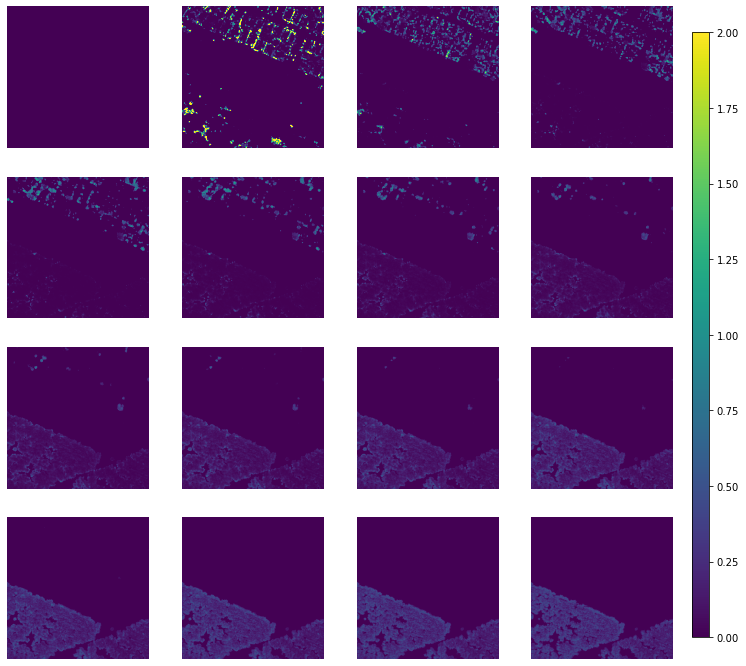

In [7]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Determine the global minimum and maximum
global_max = lad_patch.data.max()

for i in range(4):
    for j in range(4):
        im = axs[i, j].imshow(lad_patch.data[i*4 + j], vmin=0, vmax=2)
        axs[i, j].axis('off')

# Add a colorbar to the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust these numbers to place and size the colorbar
fig.colorbar(im, cax=cbar_ax)

plt.show()


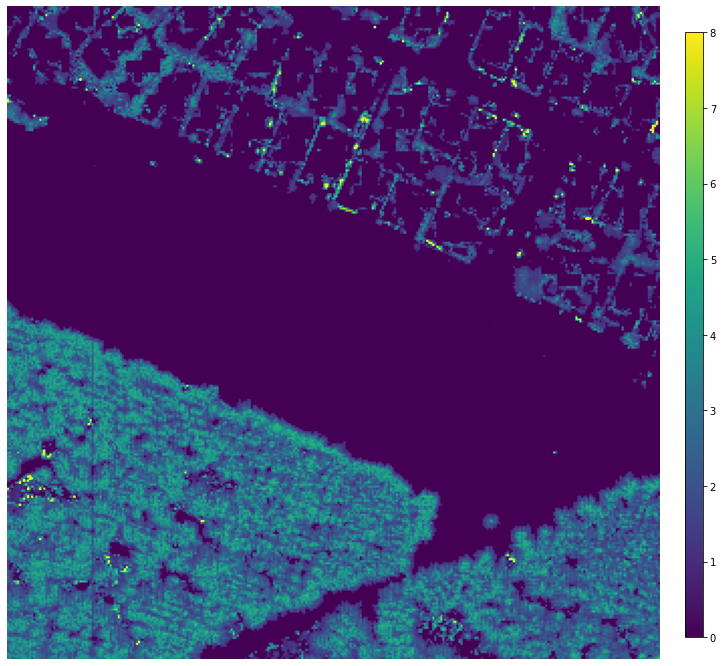

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(12, 12))

# Determine the global minimum and maximum
global_max = lad.data.max()

im=axs.imshow(np.sum(lad_patch.data, axis=0), vmin=0, vmax=8)
axs.axis('off')

# Add a colorbar to the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust these numbers to place and size the colorbar
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [9]:
lad_3D, bad_3D, tree_ids_3D, tree_type_3D, lad_patch_3D, patch_id_3D,patch_types_3D = generate_static_LAD_3D('Bottle_Lake',tmp_path, 0, config_proj, dom_cfg_d01)

/home/UOCNT/eni22/GEO4PALM/JOBS/Bottle_Lake/INPUT/Bottle_Lake_DEM.tif
Number of grid points x, y = 324, 324
Reading building height
Reading vegetation_type
Reading vegetation_height
Reading single tree_height
Reading tree_crown_diameter
Reading tree_trunk_diameter
generate_single_tree
Start generating 20 trees...
test
[-- -- -- ... -- -- --]
   Processing tree No 1 ...Tree input parameters:
----------------------
type:           Default
trunk diameter: 0.21873267
   Processing tree No 2 ...Tree input parameters:
----------------------
type:           Default
trunk diameter: 0.43111983
   Processing tree No 3 ...Tree input parameters:
----------------------
type:           Default
trunk diameter: 0.20213678
   Processing tree No 4 ...Tree input parameters:
----------------------
type:           Default
trunk diameter: 0.5786937
   Processing tree No 5 ...Tree input parameters:
----------------------
type:           Default
trunk diameter: 0.29260483
   Processing tree No 6 ...Tree input

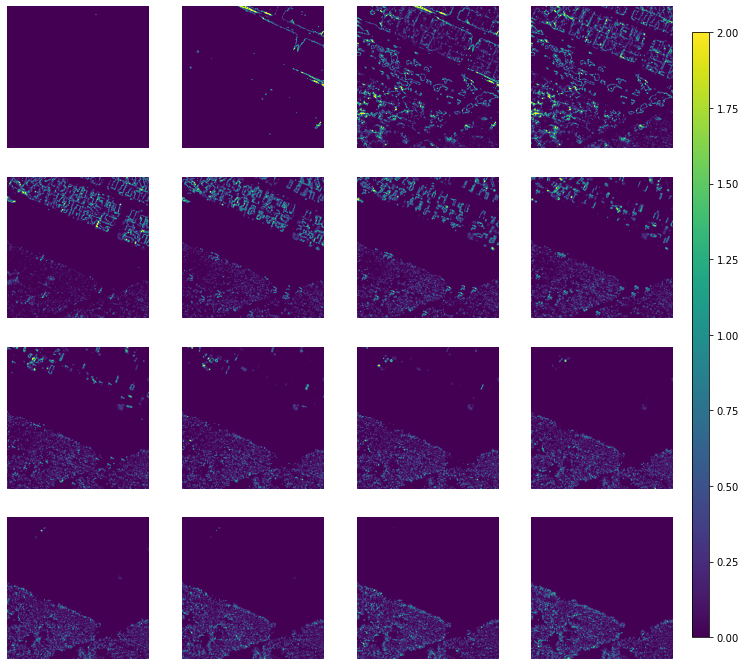

In [10]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Determine the global minimum and maximum
global_max = lad_patch_3D.data.max()

for i in range(4):
    for j in range(4):
        im = axs[i, j].imshow(lad_patch_3D.data[1+(i*4 + j)], vmin=0, vmax=2)
        axs[i, j].axis('off')

# Add a colorbar to the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust these numbers to place and size the colorbar
fig.colorbar(im, cax=cbar_ax)

plt.show()


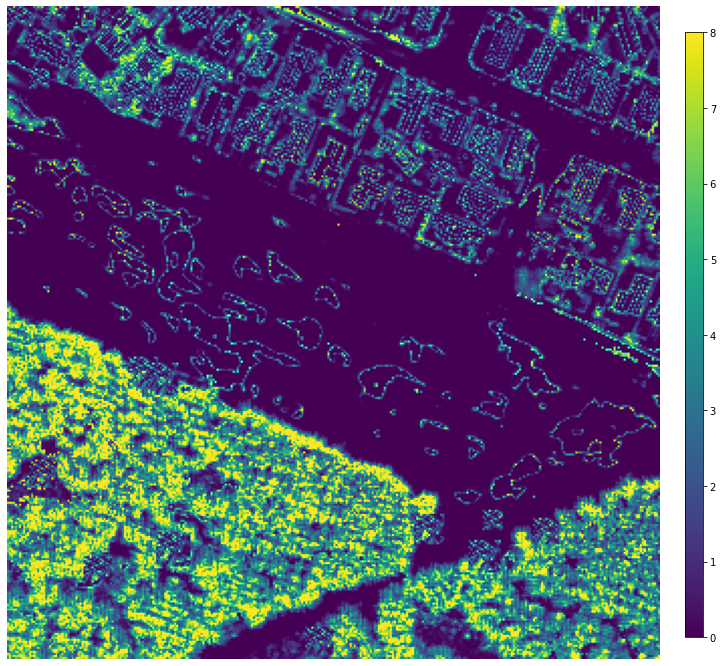

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(12, 12))

# Determine the global minimum and maximum
global_max = lad.data.max()

im=axs.imshow(np.sum(lad_patch_3D[2:,:,].data, axis=0), vmin=0, vmax=8)
axs.axis('off')

# Add a colorbar to the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust these numbers to place and size the colorbar
fig.colorbar(im, cax=cbar_ax)

plt.show()